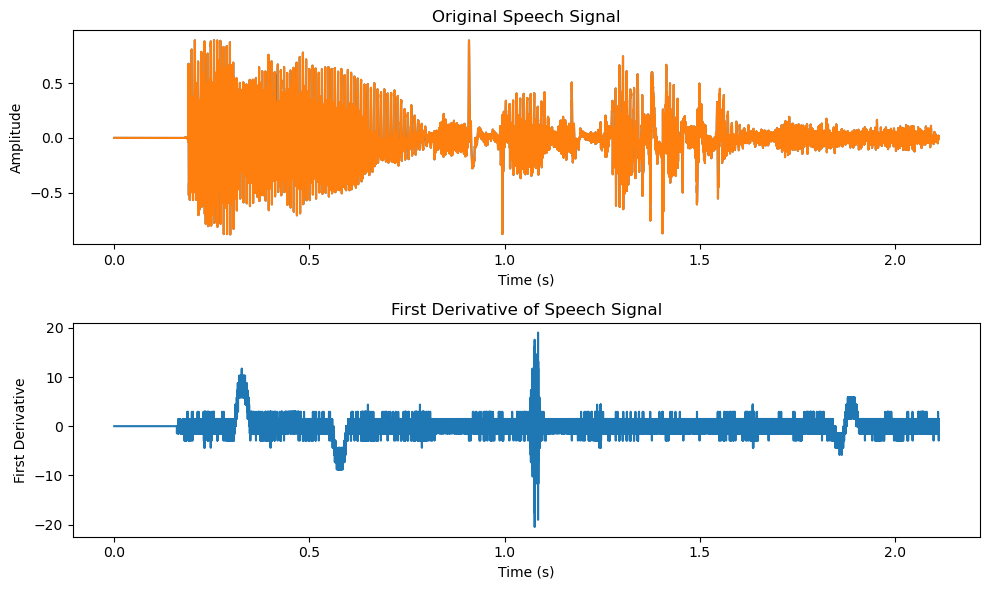

Playing the original speech signal
Playing the first derivative of speech signal


In [26]:
#  A1. Find the first derivative of your speech signal with finite difference method.
#  Listen to the first derivative signal and the original speech signal. 

import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import sounddevice as sd

speech_file_path = r"E:\AI in Speech\Lab\Lab1\Lab1\audio.wav"

speech_signal,sample_rate = sf.read(speech_file_path)

time_interval = 1 / sample_rate
first_derivative = np.diff(speech_signal) / time_interval
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(speech_signal)) / sample_rate, speech_signal)
plt.title('Original Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)

plt.plot(np.arange(len(first_derivative)) / sample_rate, first_derivative)
plt.title('First Derivative of Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('First Derivative')

plt.tight_layout()
plt.show()
sf.write('first_derivative_signal.wav', first_derivative, sample_rate)


print("Playing the original speech signal")
sd.play(speech_signal, sample_rate)
sd.wait()

print("Playing the first derivative of speech signal")
sd.play(first_derivative, sample_rate)
sd.wait()

In [27]:
import numpy as np
import soundfile as sf

speech_file_path = r"E:\AI in Speech\Lab\Lab1\Lab1\audio.wav"

speech_signal,sample_rate = sf.read(speech_file_path)

first_derivative, sample_rate = sf.read("first_derivative_signal.wav")

original_fft = np.fft.fft(speech_signal)
original_amplitude = np.abs(original_fft)
original_frequency = np.fft.fftfreq(len(original_fft), 1 / sample_rate)

derivative_fft = np.fft.fft(first_derivative)
derivative_amplitude = np.abs(derivative_fft)
derivative_frequency = np.fft.fftfreq(len(derivative_fft), 1 / sample_rate)

original_peak_frequency = original_frequency[np.argmax(original_amplitude)]
original_peak_amplitude = np.max(original_amplitude)
derivative_peak_frequency = derivative_frequency[np.argmax(derivative_amplitude)]
derivative_peak_amplitude = np.max(derivative_amplitude)

print("Original Speech Signal is :")
print("Peak Frequency:", original_peak_frequency, "Hz")
print("Peak Amplitude:", original_peak_amplitude)

print("First Derivative of Speech Signal is:")
print("Peak Frequency:", derivative_peak_frequency, "Hz")
print("Peak Amplitude:", derivative_peak_amplitude)

Original Speech Signal is :
Peak Frequency: 11616.477272727272 Hz
Peak Amplitude: 1.79010009765625
First Derivative of Speech Signal is:
Peak Frequency: 10.890151515151514 Hz
Peak Amplitude: 6257.260354393137


In [33]:
# A2. Detect the points of zero crossing in the first derivative signal. 
# Compare the average length between two consecutive zero crossings for speech and silence regions. 
# Observe the pattern. 

import numpy as np
import soundfile as sf
first_derivative, sample_rate = sf.read("first_derivative_signal.wav")
zero_crossings = np.where(np.diff(np.sign(first_derivative)))[0]
zero_crossing_intervals = np.diff(zero_crossings)
threshold_value = 0.05 
speech_regions = zero_crossing_intervals[zero_crossing_intervals > threshold_value * sample_rate]
silence_regions = zero_crossing_intervals[zero_crossing_intervals <= threshold_value * sample_rate]
average_speech_length = np.mean(speech_regions) / sample_rate
average_silence_length = np.mean(silence_regions) / sample_rate

print("Average length between the two consecutive zero crossings in speech regions is:", average_speech_length, "seconds")
print("Average length between the two consecutive zero crossings in silence regions is:", average_silence_length, "seconds")


Average length between the two consecutive zero crossings in speech regions is: nan seconds
Average length between the two consecutive zero crossings in silence regions is: 5.5233010670515976e-05 seconds


The length Duration of first audio file: 7.152063492063492 seconds
The length Duration of Second audio file: 8.909251700680272 seconds


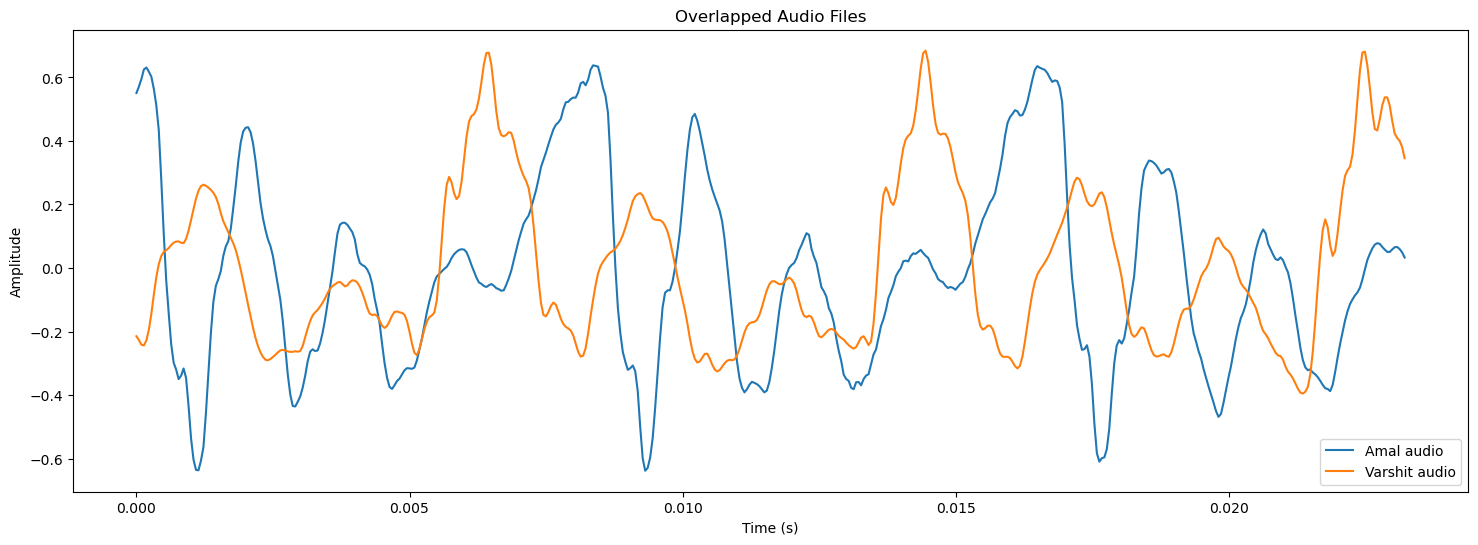

In [37]:
# A3. Speak 5 of your favorite words. Observe the length of the speech signals.
# Compare the lengths of your spoken words with those of your project team-mate. 
import librosa
import librosa.display


audio_file1 = r"E:\AI in Speech\Lab\Lab2\amal\amal.wav"
audio_file2 = r"E:\AI in Speech\Lab\Lab2\amal\varshit.wav"

# Load audio signals
y1, sr1 = librosa.load(audio_file1)
y2, sr2 = librosa.load(audio_file2)

# Duration of audio files
duration1 = librosa.get_duration(y=y1, sr=sr1)
duration2 = librosa.get_duration(y=y2, sr=sr2)

print("The length Duration of first audio file:", duration1, "seconds")
print("The length Duration of Second audio file:", duration2, "seconds")

# Remove silence function
def remove_silence(y, sr, threshold=0.01):
    yt = librosa.effects.trim(y, top_db=threshold)
    return yt[0]

# Trim silence from audio signals
audio_trimmed1 = remove_silence(y1, sr1)
audio_trimmed2 = remove_silence(y2, sr2)

# Calculate the time axes for the trimmed audio files
time1 = np.linspace(0, len(audio_trimmed1) / sr1, len(audio_trimmed1))
time2 = np.linspace(0, len(audio_trimmed2) / sr2, len(audio_trimmed2))

# Plot the trimmed audio files
plt.figure(figsize=(18, 6))
plt.plot(time1, audio_trimmed1, label='Amal audio')
plt.plot(time2, audio_trimmed2, label='Varshit audio')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Overlapped Audio Files')
plt.show()

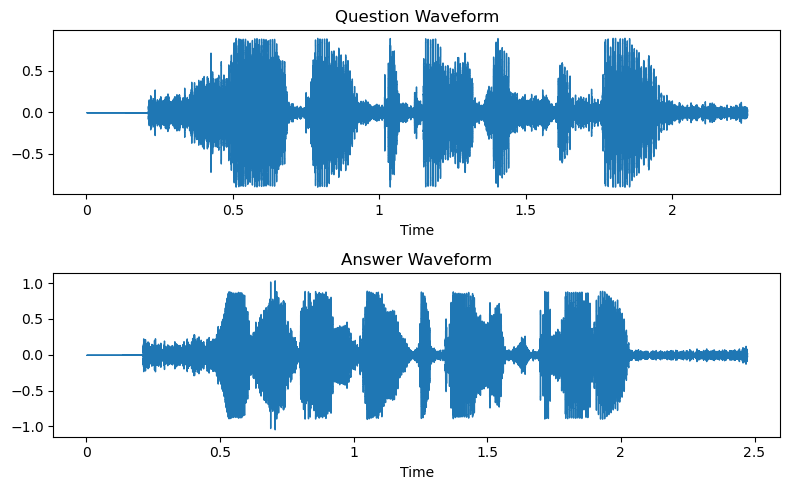

In [41]:
file1 = r"E:\AI in Speech\Lab\Lab2\amal\question.mp3"
file2 = r"E:\AI in Speech\Lab\Lab2\amal\answer.mp3"
statement_signal, sr_statement = librosa.load(file1) # Load audio signals
question_signal, sr_question = librosa.load(file2)
plt.figure(figsize=(8,5))
# Plot waveforms
plt.subplot(2, 1, 1)
librosa.display.waveshow(statement_signal, sr=sr_statement)
plt.title('Question Waveform')
plt.subplot(2, 1, 2)
librosa.display.waveshow(question_signal, sr=sr_question)
plt.title('Answer Waveform')
plt.tight_layout()
plt.show()